In [1]:
import keras
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt

In [2]:
model = load_model('test1.h5')

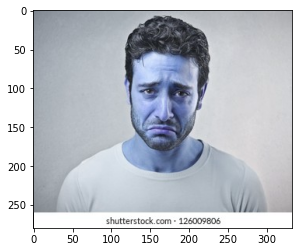

In [3]:
main_img = cv2.imread('./images/sad1.jpg')
plt.imshow(main_img)

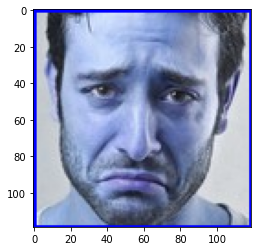

In [4]:
# Convert into grayscale
gray = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('./models/haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(main_img, (x, y), (x+w, y+h),(0, 0, 255), 2)      
    faces = main_img[y:y + h, x:x + w]
    
plt.imshow(faces)

In [10]:
import cv2
  
# Read the input image
main_img = cv2.imread('./images/sad1.jpg')
  
# Convert into grayscale
gray = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('./models/haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(main_img, (x, y), (x+w, y+h),(0, 0, 255), 2)      
    faces = main_img[y:y + h, x:x + w]

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\core\src\ocl.cpp:5515: error: (-220:Unknown error code -220) OpenCL error CL_MEM_OBJECT_ALLOCATION_FAILURE (-4) during call: clEnqueueWriteBuffer(q, handle=000001EF7BC719A0, CL_TRUE, offset=0, sz=186432, data=000001EEB5FF9020, 0, 0, 0) in function 'cv::ocl::OpenCLAllocator::upload'


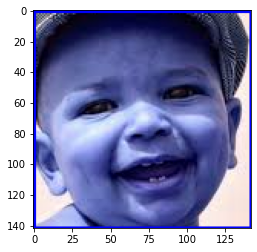

In [6]:
plt.imshow(faces)

In [7]:
img = faces.copy()
input_im = cv2.resize(img, (48, 48), interpolation = cv2.INTER_LINEAR)
gray_image = cv2.cvtColor(input_im, cv2.COLOR_BGR2GRAY)
x = image.img_to_array(gray_image)
x = np.reshape(x, (1,48, 48, 1))
x = x * 1./255

result = np.argmax(model.predict(x), axis=-1)
if result[0]==0:
    ans=("Angry")
elif result[0]==1:
    ans=("Disgust")
elif result[0]==2:
    ans=("Fear")
elif result[0]==3:
    ans=("Happy")
elif result[0]==4:
    ans=("Neutral")
elif result[0]==5:
    ans=("Sad")
else :
    ans("Surprice")

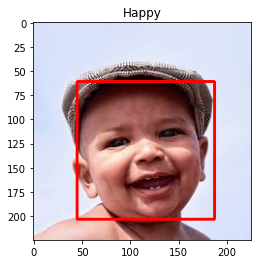

In [8]:
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(ans)
plt.savefig('result1.jpg')
plt.show()

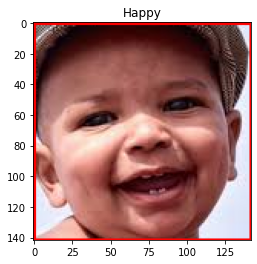

In [9]:
img = cv2.cvtColor(faces, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(ans)
plt.savefig('result2.jpg')
plt.show()